# 充填率と各目的変数 (m, kappa)の相関関係

In [27]:
# ---ライブラリのインポート ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
# --- npyファイルの読み込み ---
# train以外の場合、適宜変更すること
FR_PATH = "/mnt/c/Users/onion/Documents/analysis/FR_train.npy"
M_PATH = "/mnt/c/Users/onion/Documents/analysis/m_train.npy"
KAPPA_PATH = "/mnt/c/Users/onion/Documents/analysis/kappa_train.npy"

filling_rate = np.load(FR_PATH)
m = np.load(M_PATH)
kappa = np.load(KAPPA_PATH)

data = {
    "m": m.ravel(),
    "kappa": kappa.ravel(),
    "filling_rate": filling_rate.ravel()
}

df = pd.DataFrame(data)

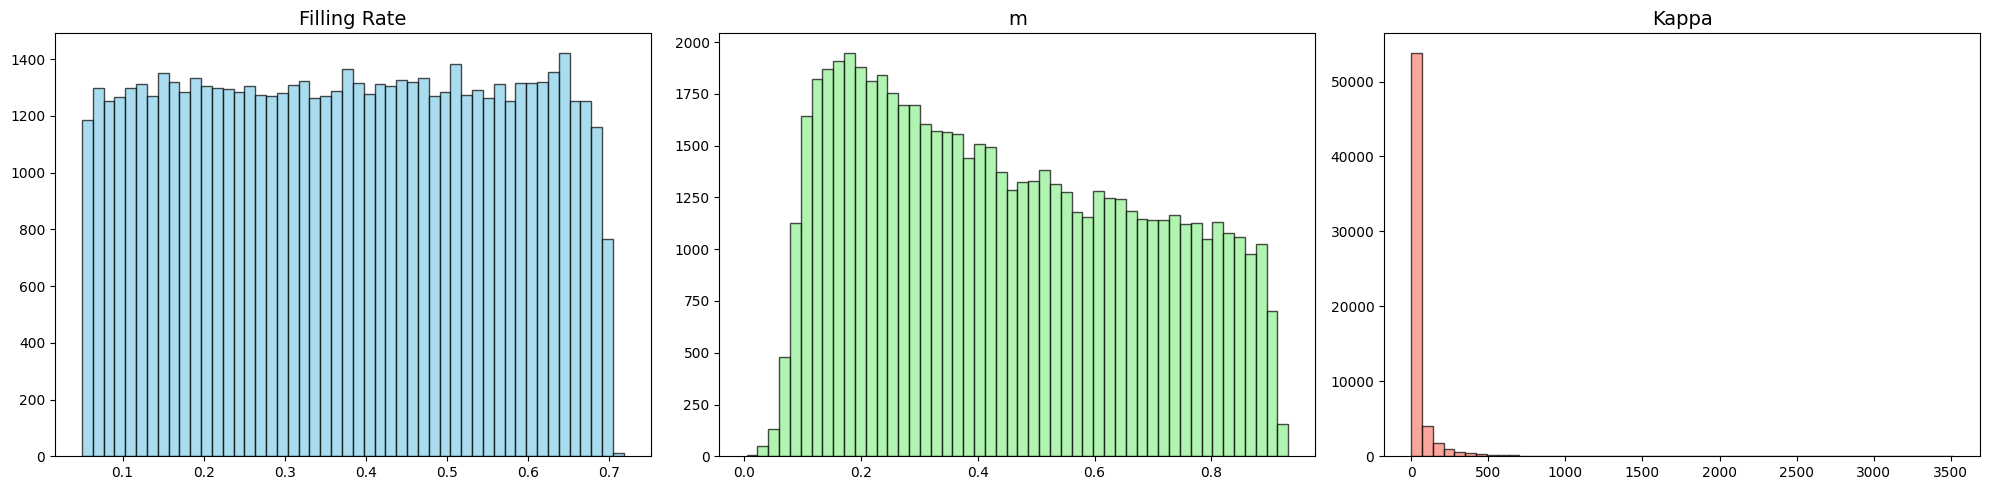

In [29]:
# --- m, kappa, filling_rateのヒストグラム ---
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(filling_rate, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax2.hist(m, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.hist(kappa, bins=50, color='salmon', edgecolor='black', alpha=0.7)

ax1.set_title("Filling Rate", fontsize=14)
ax2.set_title("m", fontsize=14)
ax3.set_title("Kappa", fontsize=14)

plt.tight_layout()
plt.show()

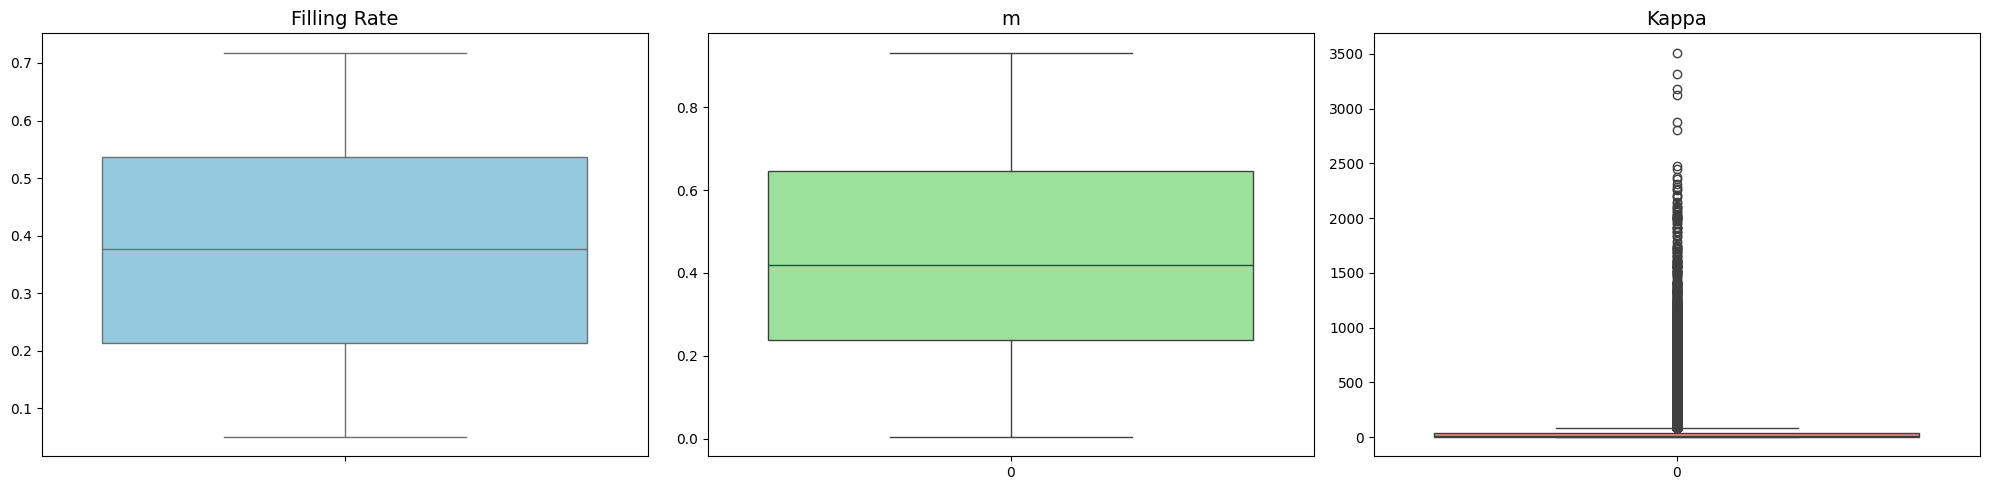

In [30]:
# --- m, kappa, filling_rateの箱ひげ図 ---
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.boxplot(filling_rate, ax=ax1, color='skyblue')
sns.boxplot(m, ax=ax2, color='lightgreen')
sns.boxplot(kappa, ax=ax3, color='salmon')

ax1.set_title("Filling Rate", fontsize=14)
ax2.set_title("m", fontsize=14)
ax3.set_title("Kappa", fontsize=14)

plt.tight_layout()
plt.show()

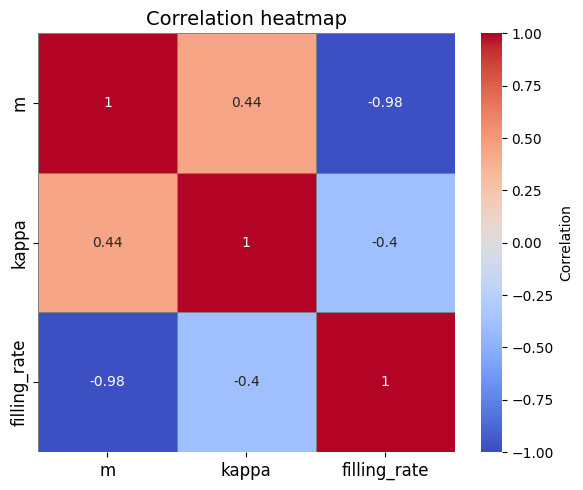

In [31]:
# --- m, kappa, filling_rateの相関関係 ---
corr = df.corr()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.set_title("Correlation heatmap", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.heatmap(corr, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray', cbar_kws={"label": "Correlation"})

plt.tight_layout()
plt.show()

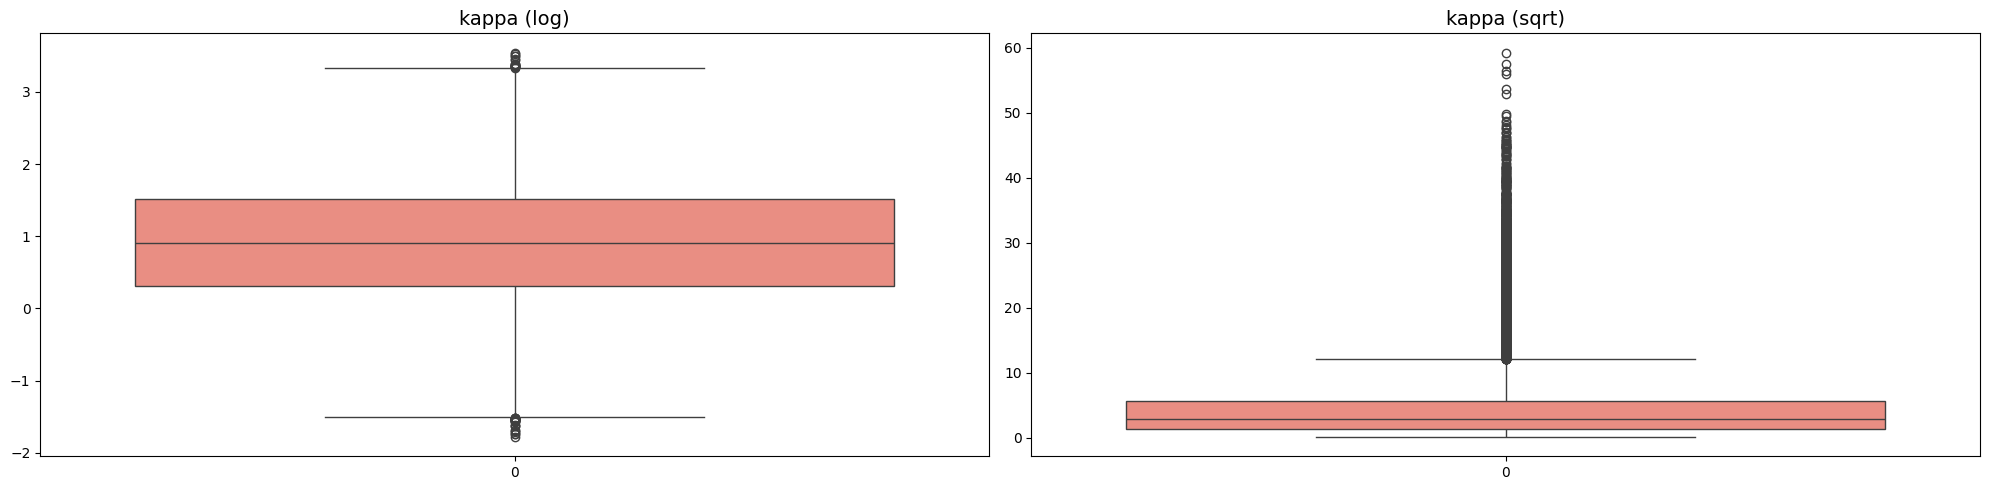

In [32]:
# --- kappaの前処理模索 ---
log_kappa = np.log10(kappa)
sqrt_kappa = np.sqrt(kappa)

df['log_kappa'] = np.log10(df['kappa'])
df['sqrt_kappa'] = np.sqrt(df['kappa'])

# log_kappaとsqrt_kappaのヒストグラム
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(log_kappa, ax=ax1, color='salmon')
sns.boxplot(sqrt_kappa, ax=ax2, color='salmon')

ax1.set_title("kappa (log)", fontsize=14)
ax2.set_title("kappa (sqrt)", fontsize=14)

plt.tight_layout()
plt.show()

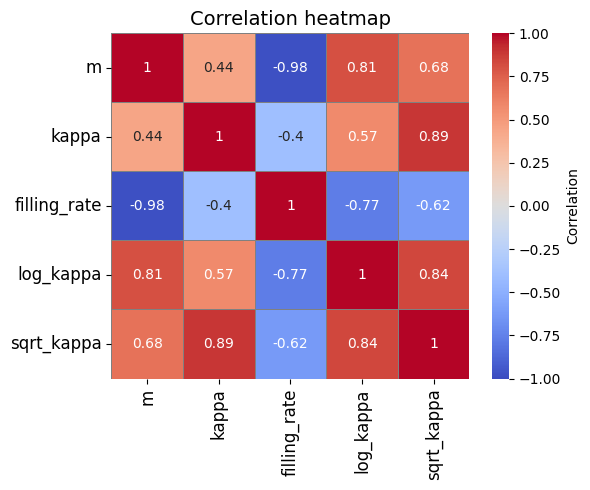

In [34]:
# --- m, kappa,log_kappa, sqrt_kappa, filling_rateの相関関係 ---
corr = df.corr()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.set_title("Correlation heatmap", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.heatmap(corr, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray', cbar_kws={"label": "Correlation"})

plt.tight_layout()
plt.show()